In [2]:
experiment_id = "1xkH1YvpT8mql311bCVwZA" # INSERT EXPERIMENT HERE
# Guide: https://www.tensorflow.org/tensorboard/dataframe_api

In [3]:
from packaging import version
import matplotlib as mpl
mpl.rc('font', family='serif', serif='Times New Roman')
import seaborn as sns
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
sns.axes_style()
from matplotlib import pyplot as plt


import tensorboard as tb


In [4]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)


TensorBoard version:  2.10.1


In [5]:

experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df


,run,tag,step,value
0,.,epoch_loss,0,10.138692
1,.,epoch_loss,1,6.146515
2,.,epoch_loss,2,2.793044
3,.,epoch_loss,3,1.684392
4,.,epoch_loss,4,1.376424
...,...,...,...,...
1195,.,epoch_val_rpn_class_loss,95,0.005461
1196,.,epoch_val_rpn_class_loss,96,0.006549
1197,.,epoch_val_rpn_class_loss,97,0.003436
1198,.,epoch_val_rpn_class_loss,98,0.005951


In [6]:
dfw = experiment.get_scalars(pivot=True)
dfw

,run,step,epoch_loss,epoch_mrcnn_bbox_loss,epoch_mrcnn_class_loss,epoch_mrcnn_mask_loss,epoch_rpn_bbox_loss,epoch_rpn_class_loss,epoch_val_loss,epoch_val_mrcnn_bbox_loss,epoch_val_mrcnn_class_loss,epoch_val_mrcnn_mask_loss,epoch_val_rpn_bbox_loss,epoch_val_rpn_class_loss
0,.,0,10.138692,4.039468,0.038660,0.329907,5.534071,0.187886,5.522365,0.200047,0.030267,0.375720,7.282693,0.059282
1,.,1,6.146515,1.883714,0.018754,0.298652,3.918223,0.027170,5.873092,2.933670,0.033072,0.402559,2.479340,0.024451
2,.,2,2.793044,1.028732,0.030820,0.363131,1.351840,0.018520,1.431564,0.621395,0.057055,0.287609,0.457080,0.008423
3,.,3,1.684392,0.705374,0.025660,0.314867,0.617043,0.021448,1.124787,0.550887,0.029152,0.272478,0.265873,0.006397
4,.,4,1.376424,0.530784,0.030704,0.320500,0.475944,0.018491,1.334860,0.540858,0.064506,0.265415,0.426503,0.037579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,.,95,0.450358,0.065145,0.003622,0.107118,0.268711,0.005762,0.487736,0.067153,0.000669,0.103595,0.310857,0.005461
96,.,96,0.514103,0.065071,0.003979,0.106328,0.332254,0.006471,0.505891,0.056078,0.004667,0.090917,0.347680,0.006549
97,.,97,0.480358,0.060953,0.003901,0.110013,0.298954,0.006537,0.347882,0.052896,0.003038,0.112855,0.175658,0.003436
98,.,98,0.701766,0.075433,0.003223,0.115217,0.500987,0.006907,0.588023,0.079164,0.009341,0.102845,0.390721,0.005951


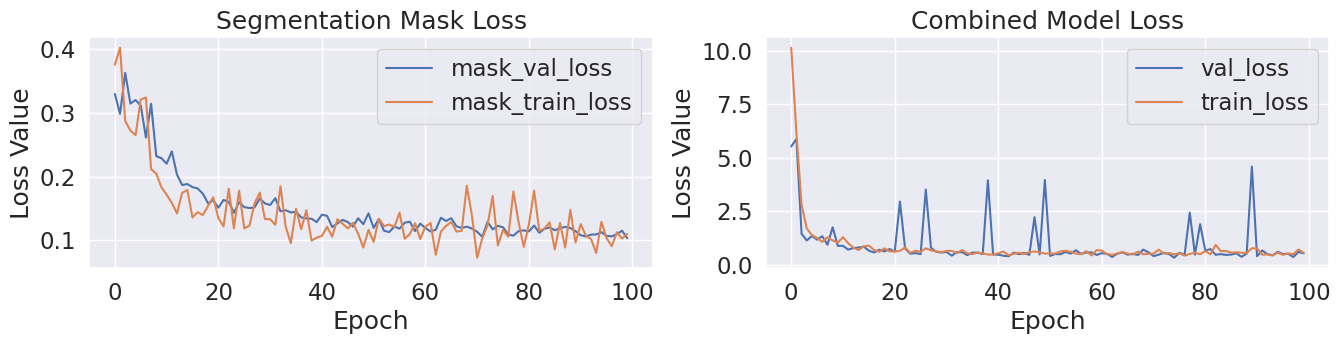

In [14]:
# Filter the DataFrame to only validation data, which is what the subsequent
# analyses and visualization will be focused on.
#dfw_validation = dfw[dfw.run.str.endswith("/val")]
#print(dfw_validation)
# Get the optimizer value for each row of the validation DataFrame.
#optimizer_validation = dfw.run.apply(lambda run: run.split(",")[0])
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

sns.set(font_scale=1.5)
plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
sns.lineplot(data=dfw, x="step", y="epoch_mrcnn_mask_loss", label=str("mask_val_loss"))
ax = sns.lineplot(data=dfw, x="step", y="epoch_val_mrcnn_mask_loss", label=str("mask_train_loss"))
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss Value")
ax.set_title("Segmentation Mask Loss")
plt.subplot(1, 2, 2)
sns.lineplot(data=dfw, x="step", y="epoch_val_loss", label=str("val_loss"))
ax = sns.lineplot(data=dfw, x="step", y="epoch_loss", label=str("train_loss"))
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss Value")
ax.set_title("Combined Model Loss")
plt.savefig("plot_result.pdf")

<Figure size 640x480 with 0 Axes>